<a href="https://colab.research.google.com/github/kevinomerkilic/computational_chemistry/blob/main/NBoxPartsSet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving simulation_ar.log to simulation_ar.log


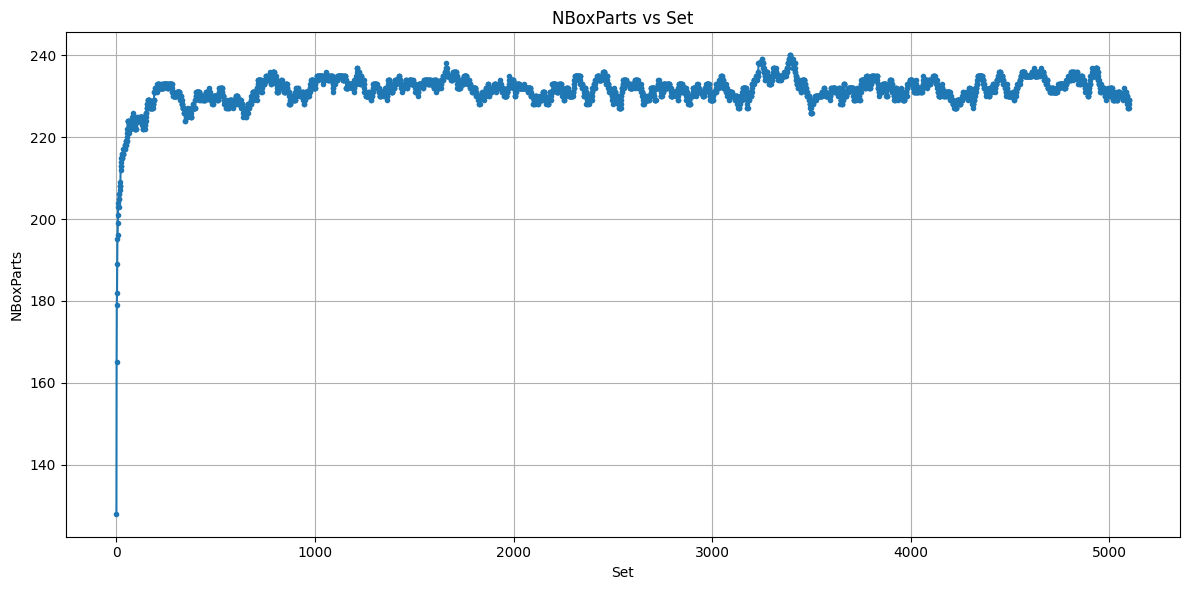

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data assuming it's in tab-separated plain text format
df = pd.read_csv("simulation_ar.log", sep="\t")

# Filter for rows with NBoxParts >= 128 (or another threshold)
filtered_df = df[df["NBoxParts"] >= 128]

# Plot
plt.figure(figsize=(12, 6))
plt.plot(filtered_df["Set"], filtered_df["NBoxParts"], linestyle='-', marker='o', markersize=3)
plt.xlabel("Set")
plt.ylabel("NBoxParts")
plt.title("NBoxParts vs Set")
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

# Load the file (adjust filename as needed)
df = pd.read_csv("simulation_ar.log", sep='\t')

# Preview to confirm it loaded correctly
df.head()


,Set,Temp[K],size_x[AA],size_y[AA],size_z[AA],Volume[AA^3],ffE/particle[K],sfE/particle[K],E/particle[K],NGaugeParts,NBoxParts,NTotal,Dens[mmol/cm^3],muId[K],muEx[K],mu[K]
0,1,87.3,30.0,30.0,30.0,14137.166941,-145.937074,-679.987508,-825.924582,0,128,128,15.034766,NaN,1.0,-1139.682556
1,2,87.3,30.0,30.0,30.0,14137.166941,-189.007548,-658.762027,-847.769575,0,165,165,19.380753,NaN,1.0,-1139.682556
2,3,87.3,30.0,30.0,30.0,14137.166941,-210.442472,-661.241654,-871.684125,0,179,179,21.025181,NaN,1.0,-1139.682556
3,4,87.3,30.0,30.0,30.0,14137.166941,-209.568269,-666.873362,-876.441631,0,182,182,21.377558,NaN,1.0,-1139.682556
4,5,87.3,30.0,30.0,30.0,14137.166941,-222.416836,-664.512633,-886.929469,0,189,189,22.199772,NaN,1.0,-1139.682556


In [ ]:
# Skip the first 1000 sets
production_df = df.iloc[1000:]

# Extract the NBoxParts values
N_values = production_df["NBoxParts"].values

import numpy as np

# Constants
k_B = 1.380649e-23         # J/K
T = 87.3                   # K
V = 1.181e-26              # m³ (corrected using d_int)
                           # m³ (volume of spherical pore of diameter 3 nm) # d int ≈d ext −1.7168 σ sf +σ ff
                           # d ext =  30.0 A˚
                           # σ sf  = 3.0   A˚(Argon–SiO₂ wall)
                           # σ ff  = 3.405 A˚(Argon–Argon)


# Stats
N_avg = np.mean(N_values)
N_var = np.var(N_values)

# Equation for Bulk Modulus
K = (k_B * T * N_avg**2) / (V * N_var)

# Output
print(f"Average N: {N_avg:.2f}")
print(f"Variance in N: {N_var:.2f}")
print(f"Bulk Modulus K ≈ {K:.2e} Pa")


Average N: 232.27
Variance in N: 4.79
Bulk Modulus K ≈ 1.15e+09 Pa
